<a href="https://colab.research.google.com/github/tanzeel-a/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Assignment01_Problem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DH607 - Assignment 01 - Problem 7
This notebook provides youa. template to solve Problem 7 of your Assignment 01. While starter code is provided, you are expected to fill in the details across different code blocks indicated by "INSERT YOUR CODE HERE".

**In your final submission include a link to this notebook. Please ensure you make your notebooks available for viewing before sharing the link. To evaulate, we will run your notebooks so please ensure that "Runtime -> Restart session and run all" when invoked on your notebook runs without errors **.

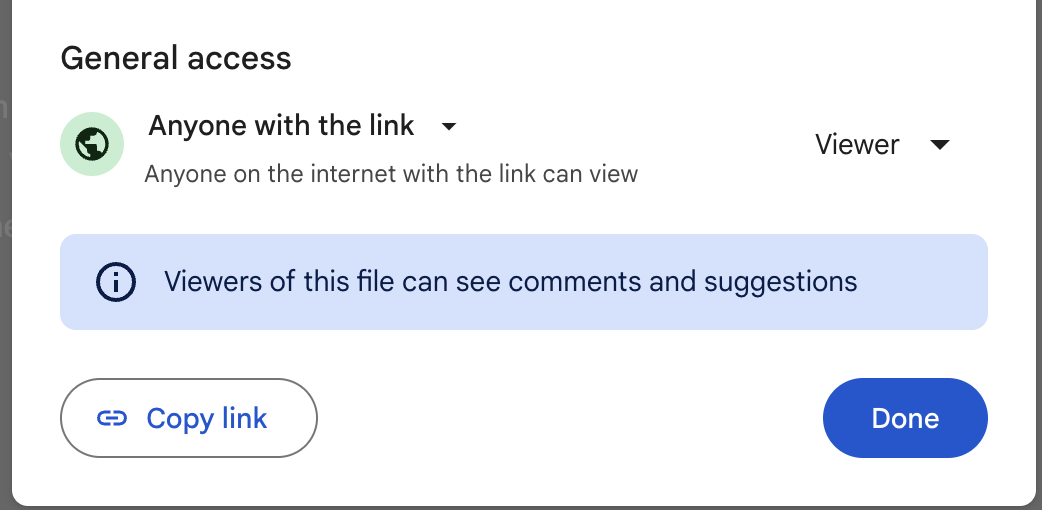



# Problem 5 (Total: 20 points)

We are interested in identifying if there is a relationship between the length of the genome and the number of genes found in a genome. We will use the summary available from [NCBI](https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/) across eukaryotes, prokaryotes and viruses.

We will use [ggplot2](https://ggplot2.tidyverse.org/) for plotting. There are multiple tutorials available on the web, but [see this](https://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html) for a good starting point.

# Install packages

We weill install packages required for the rest of the analysis.


In [1]:
list.of.packages <- c("tidyverse",  "ggpubr")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[, "Package"])]
if (length(new.packages)) install.packages(new.packages)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




# Imports and functions

In [2]:
library(tidyverse) # imports multiple packages for handling and plotting data easily
library(ggpubr) # a package for producing publication quality figures
theme_set(theme_pubr()) # set the theme to produce publication quality figures

# this function filters a given dataframe to only retain
# complete or near complete genomes by checking
# status is chromosome, complete genome or scaffold
FilterData <- function(df) {
  df <- df %>% filter(Status %in% c("Chromosome", "Complete Genome", "Scaffold"))
  return(df)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Read Data

We will fetch data of all genomes on NCBI from its genome reports database. These are tab separated files which contain all the relevant information about a genome sequence deposited to NCBI: organism name, GC content, genome size, number of genes. Information on eukaryotic, prokaryotic and viral genomes are in separate files.

In [3]:
eukaryotes <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt")
prokaryotes <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt")
viruses <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/viruses.txt")

viruses$`Size (Mb)` <- viruses$`Size (Kb)`/1000 # Viruses dataframe does not have a Size(Mb) column so we create it here

Rows: 37836 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (13): #Organism/Name, BioProject Accession, Group, SubGroup, GC%, Assem...
dbl   (4): TaxID, BioProject ID, Size (Mb), Scaffolds
date  (2): Release Date, Modify Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 727893 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (17): #Organism/Name, BioProject Accession, Group, SubGroup, GC%, Repli...
dbl   (4): TaxID, BioProject ID, Size (Mb), Scaffolds
date  (2): Release Date, Modify Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_type

You can see all the column names using the `columns()` command.

In [4]:
head(eukaryotes, n = 2)

#Organism/Name,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,<chr>
Neopyropia yezoensis,2788,PRJNA589917,589917,Other,Other,107.591,64.8454,GCA_009829735.1,chromosome 1:CM020618.1; chromosome 2:CM020619.1; chromosome 3:CM020620.1,WMLA01,28,-,-,2020-01-03,2020-01-06,Chromosome,Ocean University,SAMN13316713
Emiliania huxleyi CCMP1516,280463,PRJNA77753,77753,Protists,Other Protists,167.676,64.5,GCA_000372725.1,-,AHAL01,7795,38549,38554,2013-04-19,2014-08-01,Scaffold,JGI,SAMN02744062


In [5]:
head(viruses, n = 2)

#Organism/Name,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Kb),GC%,Host,Segmemts,Genes,Proteins,Release Date,Modify Date,Status,Size (Mb)
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<dbl>
Plasmavirus L2,46014,NA,0,Other,Plasmaviridae,11.965,32,bacteria,Unknown:NC_001447.1/L13696.1,14,14,1993-06-11,2020-12-20,Complete Genome,0.011965
Pseudoalteromonas phage PM2,2905728,NA,0,Other,Corticoviridae,10.079,42.2,bacteria,Unknown:NC_000867.1/AF155037.1,22,22,1999-07-13,2021-12-22,Complete Genome,0.010079


In [6]:
head(eukaryotes, n =1)

#Organism/Name,TaxID,BioProject Accession,BioProject ID,Group,SubGroup,Size (Mb),GC%,Assembly Accession,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Status,Center,BioSample Accession
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,<chr>
Neopyropia yezoensis,2788,PRJNA589917,589917,Other,Other,107.591,64.8454,GCA_009829735.1,chromosome 1:CM020618.1; chromosome 2:CM020619.1; chromosome 3:CM020620.1,WMLA01,28,-,-,2020-01-03,2020-01-06,Chromosome,Ocean University,SAMN13316713


In [7]:
prokaryotes$taxon <- "Prokaryote"
viruses$taxon <- "Virus"
eukaryotes$taxon <- "Eukaryote"

# collect all information in one data frame
all.data <- bind_rows(list(prokaryotes, viruses, eukaryotes))

# retain only more or less complete genomes: Chromosome/Scaffold/Whole Genome  and exclude 'Contigs'
data.filtered <- FilterData(all.data)
data.filtered$Genes <- as.numeric(data.filtered$Genes)

# remove genomes that have number of genes or genome size missing (NA)
data.filtered <- data.filtered %>%
  filter(!is.na(Genes)) %>%
  filter(!is.na(`Size (Mb)`))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# Problem 7(a): Plot the distbution of Genes (5 points)

- Which column represents the number of genes in the dataset?
- Plot a histogram of the log10(number of genes) in the dataset
- Calculate the summary of number of genes in the dataset

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_bar()`).”


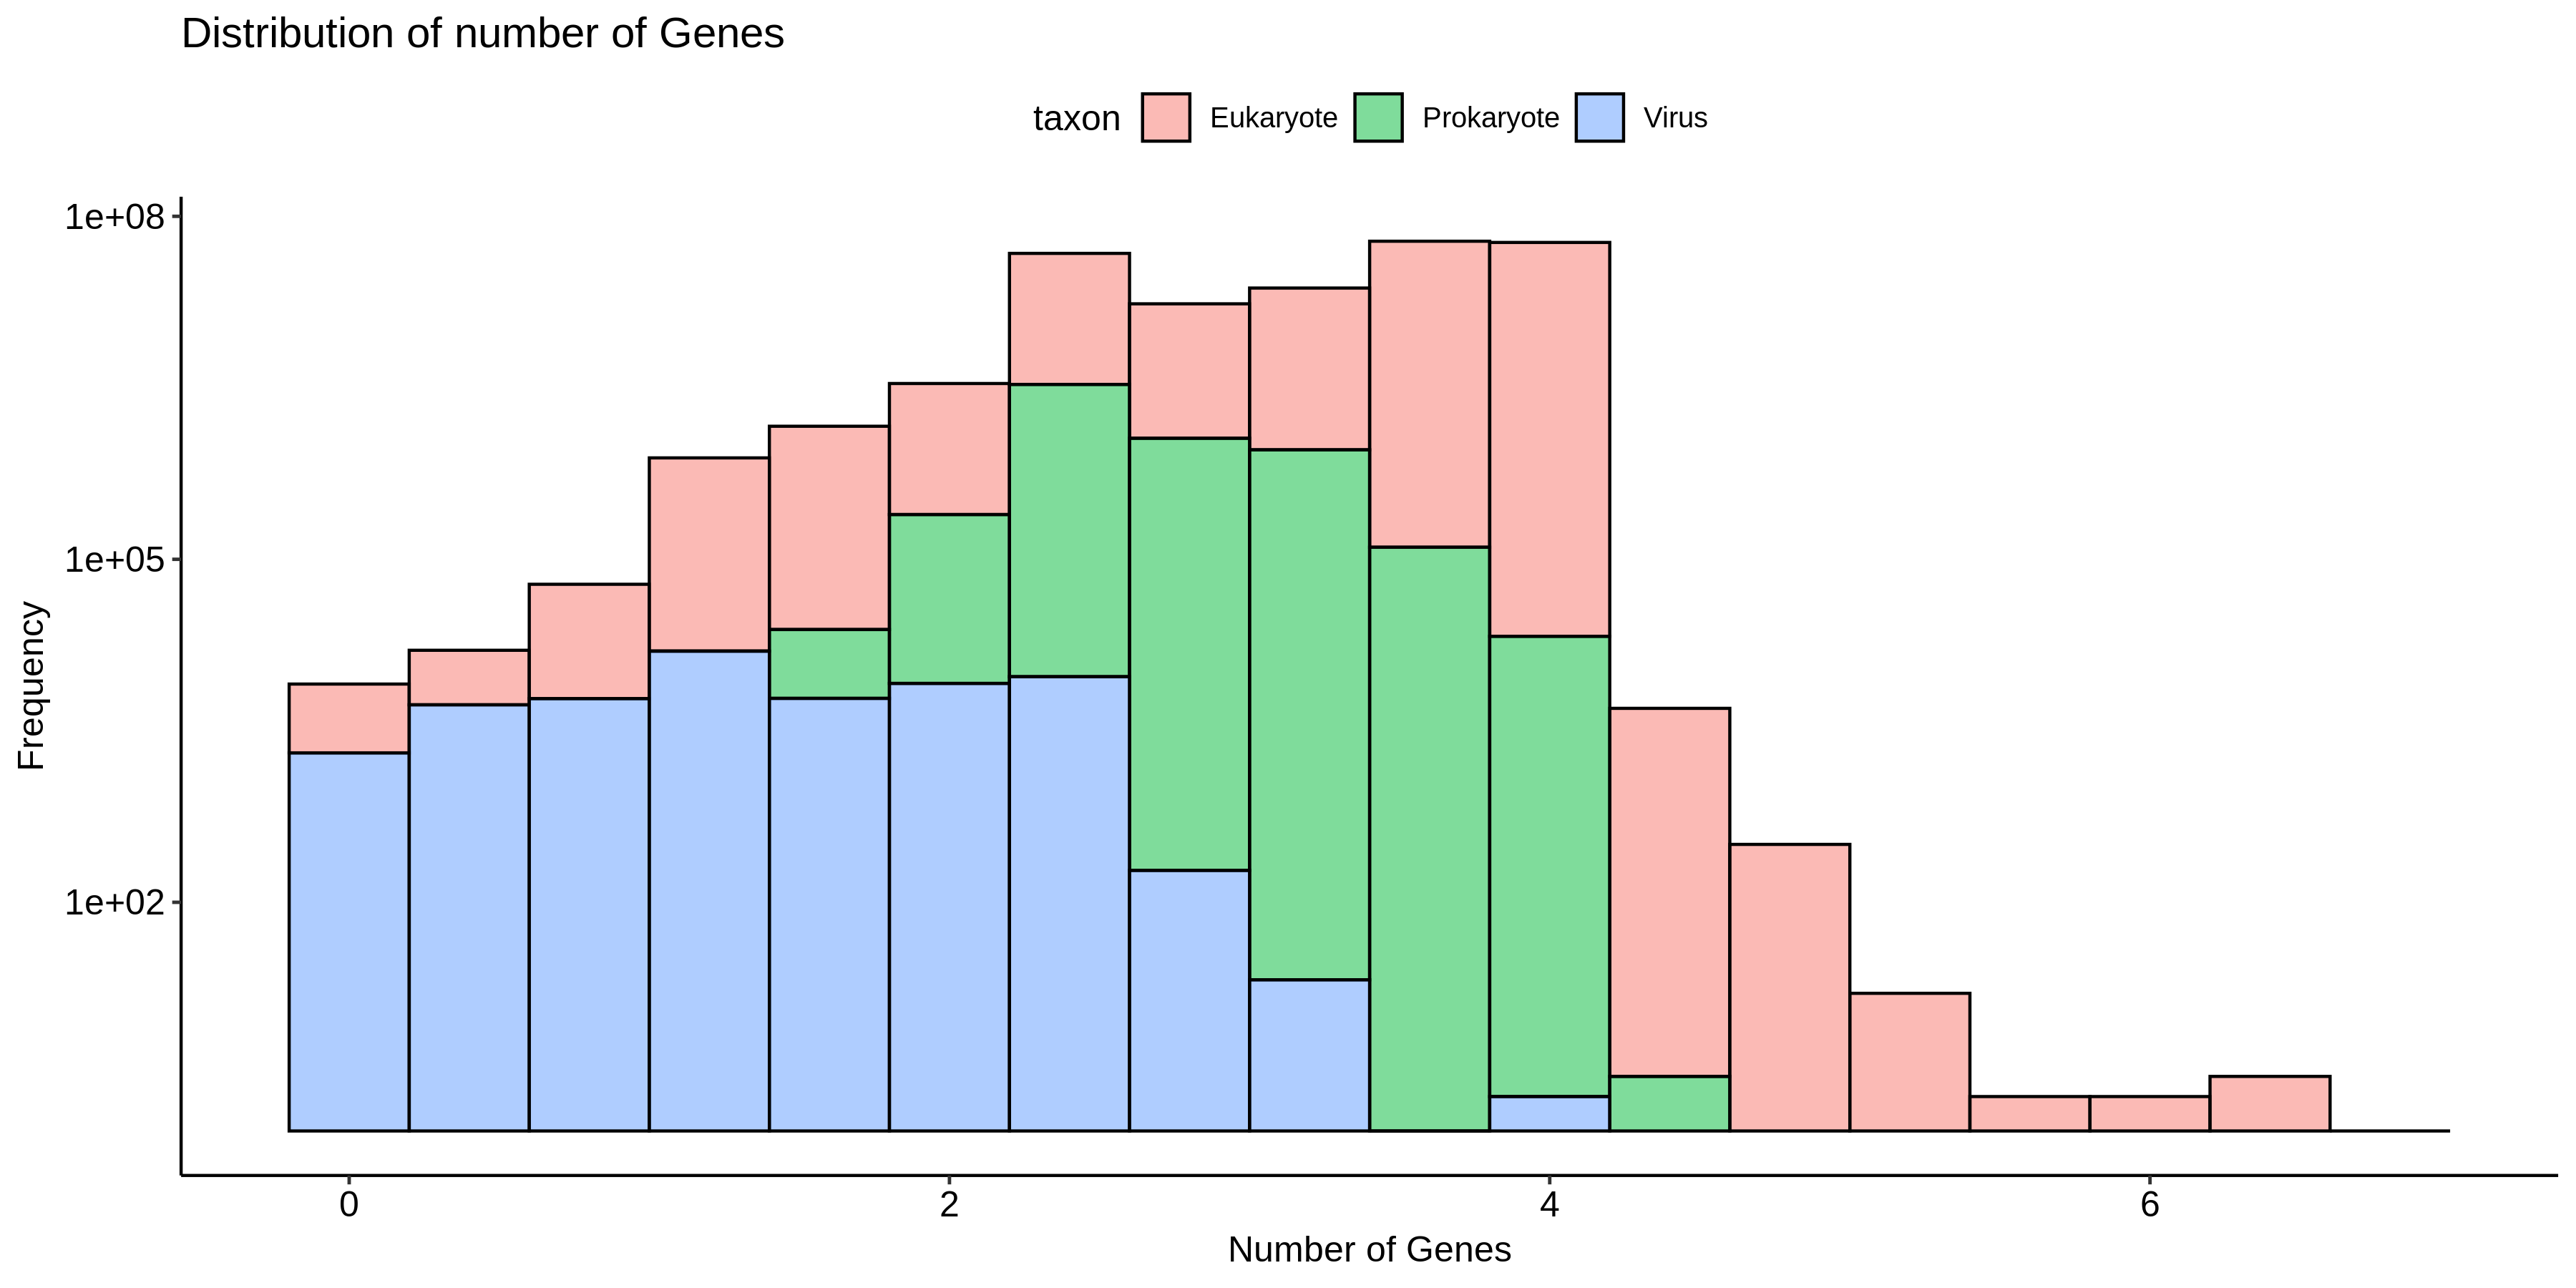

In [35]:
# IDENTIFY THE COLUMN REPRESENTING THE NUMBER OF GENES IN THE DATASET
# the genes column represents the number of genes
# PLOT THE DISTRIBUTION OF log10() OF GENES
# INSERT CODE HERE
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
ggplot(data = data.filtered, aes(x = log10(Genes), fill = taxon)) +
  geom_histogram(binwidth = 0.4 , color = "black", alpha = 0.5) +
  labs(title = "Distribution of number of Genes",
       x = "Number of Genes",
       y = "Frequency") +
  scale_y_log10()+
  theme_pubr()

In [9]:
# SHOW THE SUMMARY STATISTICS OF NUMBER OF GENES
# INSERT CODE HERE
summary(data.filtered$Genes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    1176    2956    3357    4798 4736081 

# Problem 7(b): Determine the 99.5% quantile of number of genes (5 points)

As you notice from the dataset most organism have <1e5 genes. There are some outlier species with very high number of genes (>1e6).
These are not real and are annotation artifacts. We want to first calculate what is the 99.5 percentile of the number of genes - it is a number such that 99.5% of the entries in our dataset are below this number. This will guard us against potential outliers.

In [10]:
percentile <- 0.95
# CALCULATE THE 95% QUANTILE of NUMBER OF GENES
# INSERT CODE HERE

ngenes_995percentile <-  quantile(data.filtered$Genes, probs = percentile)# YOUR CODE HERE - You can read the documentation of quantile function by doing ?quantile
ngenes_995percentile

95% 
6575

[link text](https://)

# Problem 7(c): Filter out dataset (5 points)

We will now use the `ngenes_995percentile` and retain only entries where the number of genes is below this number. We will store our results in a new dataframe `data.ultrafiltered`

In [11]:
# INSERT CODE HERE

data.ultrafiltered  <- data.filtered %>% filter(Genes < ngenes_995percentile)
colnames(data.ultrafiltered)

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Mb)"            "GC%"                  "Replicons"           
[10] "WGS"                  "Scaffolds"            "Genes"               
[13] "Proteins"             "Release Date"         "Modify Date"         
[16] "Status"               "Center"               "BioSample Accession" 
[19] "Assembly Accession"   "Reference"            "FTP Path"            
[22] "Pubmed ID"            "Strain"               "taxon"               
[25] "Size (Kb)"            "Host"                 "Segmemts"

# Problem 7(d): How does the number of genes vary by genome size (5 points):

You want to plot the number of genes as a function of genome size using `data.ultrafiltered`. You already know the column which stores the genes information. The code for plotting the `GC%` as a function of genome size is available in [this notebook](https://colab.research.google.com/drive/1dfdE5dgJdMY3qo5GFtIJktMLSZEv3nNq)



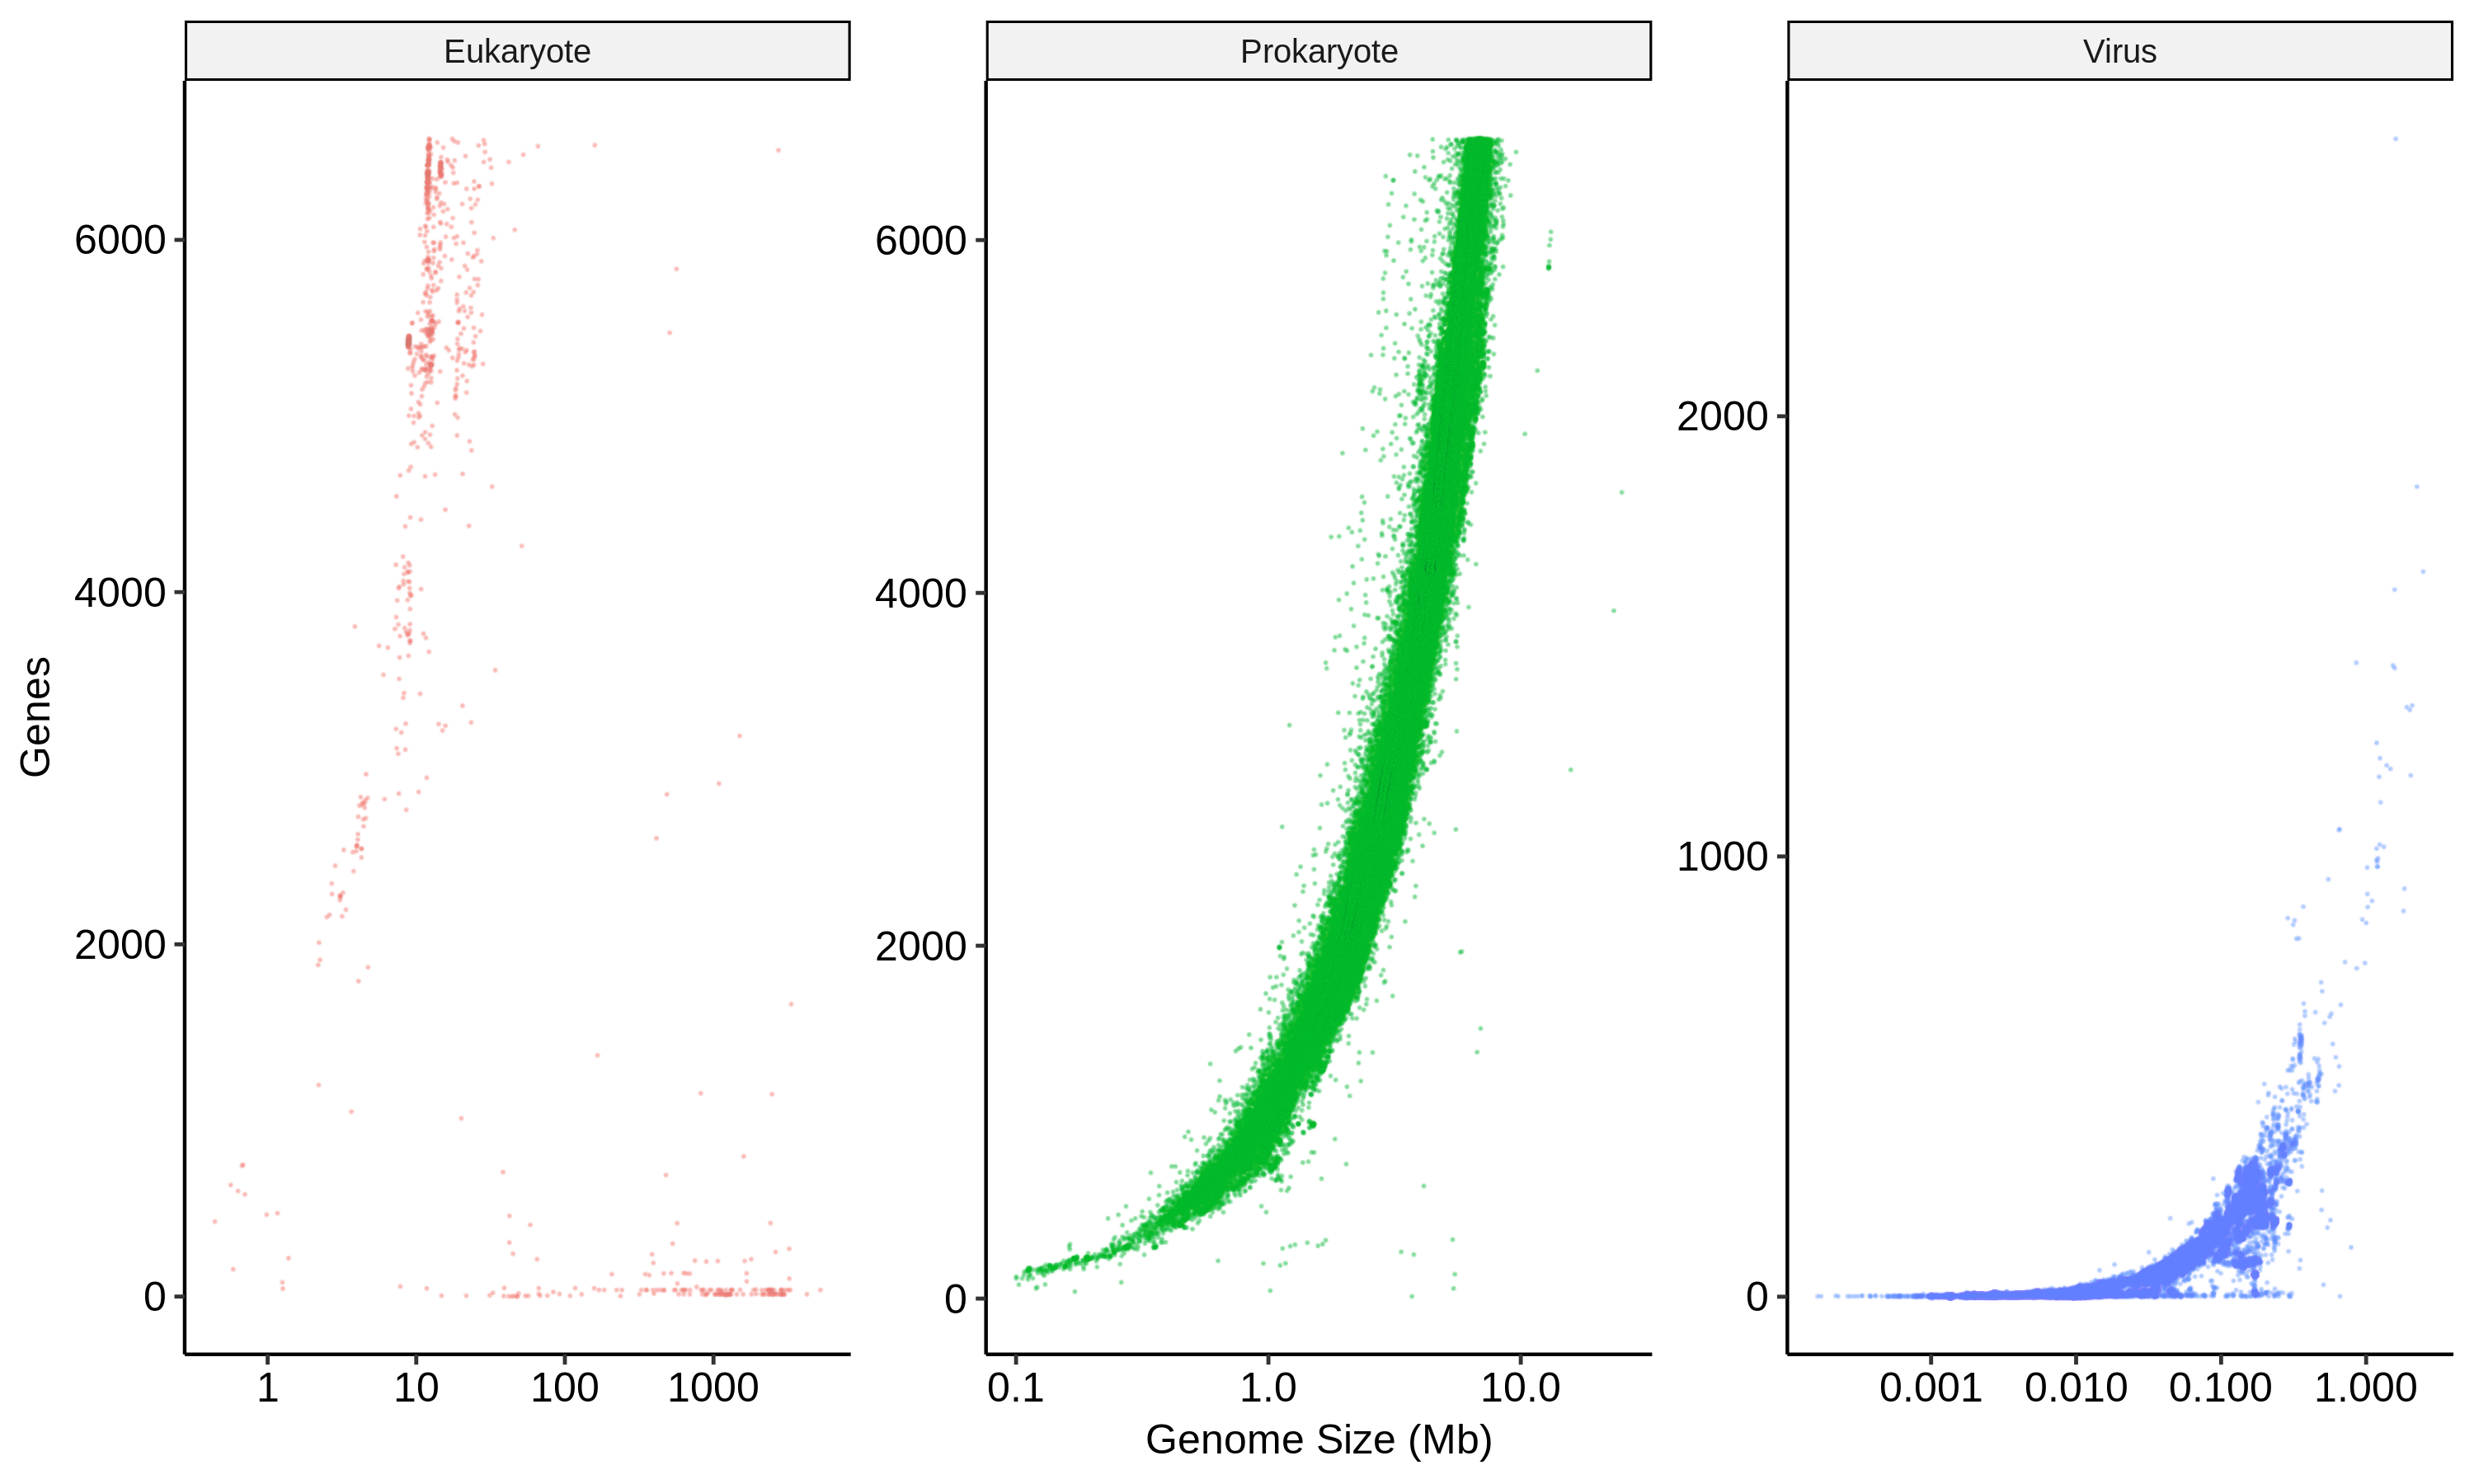

In [51]:
# set plot width and height
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

# WRITE CODE HERE TO PLOT THE DISTRIBUTION OF GENES AS A FUNCTION OF GENOME SIZE
# SEE https://colab.research.google.com/drive/1d
#fdE5dgJdMY3qo5GFtIJktMLSZEv3nNq FOR EXAMPLE CODE
# INSERT CODE HERE
ggplot(data = data.ultrafiltered, aes(x = (`Size (Mb)`) , y = (Genes),colour = taxon))+
      geom_point(size= 0.05 , alpha = 0.3 ) +
      facet_wrap(~taxon, scales = "free")+
      theme(legend.position = "none")+
      geom_jitter(size = 0.5, alpha = 0.01)+
      scale_x_log10()+
      labs(
    x = "Genome Size (Mb)",
    y = "Genes"
  )

# Problem 5(e): What are the distinct clusters in the eukaryote data (5 points):

You would now like to investigate what is happening with the Eukaryotes data points. If you plotted the above relationship you will see there is something interesting about the eukaryotes - they form two separate cluster of data points.  You can use the metadata available the dataframe to color the points.

Generate a plot which would highlight the what is going on with the two cluster of points in the Eukaryotes.

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Mb)"            "GC%"                  "Assembly Accession"  
[10] "Replicons"            "WGS"                  "Scaffolds"           
[13] "Genes"                "Proteins"             "Release Date"        
[16] "Modify Date"          "Status"               "Center"              
[19] "BioSample Accession"  "taxon"

Saving 6.67 x 6.67 in image


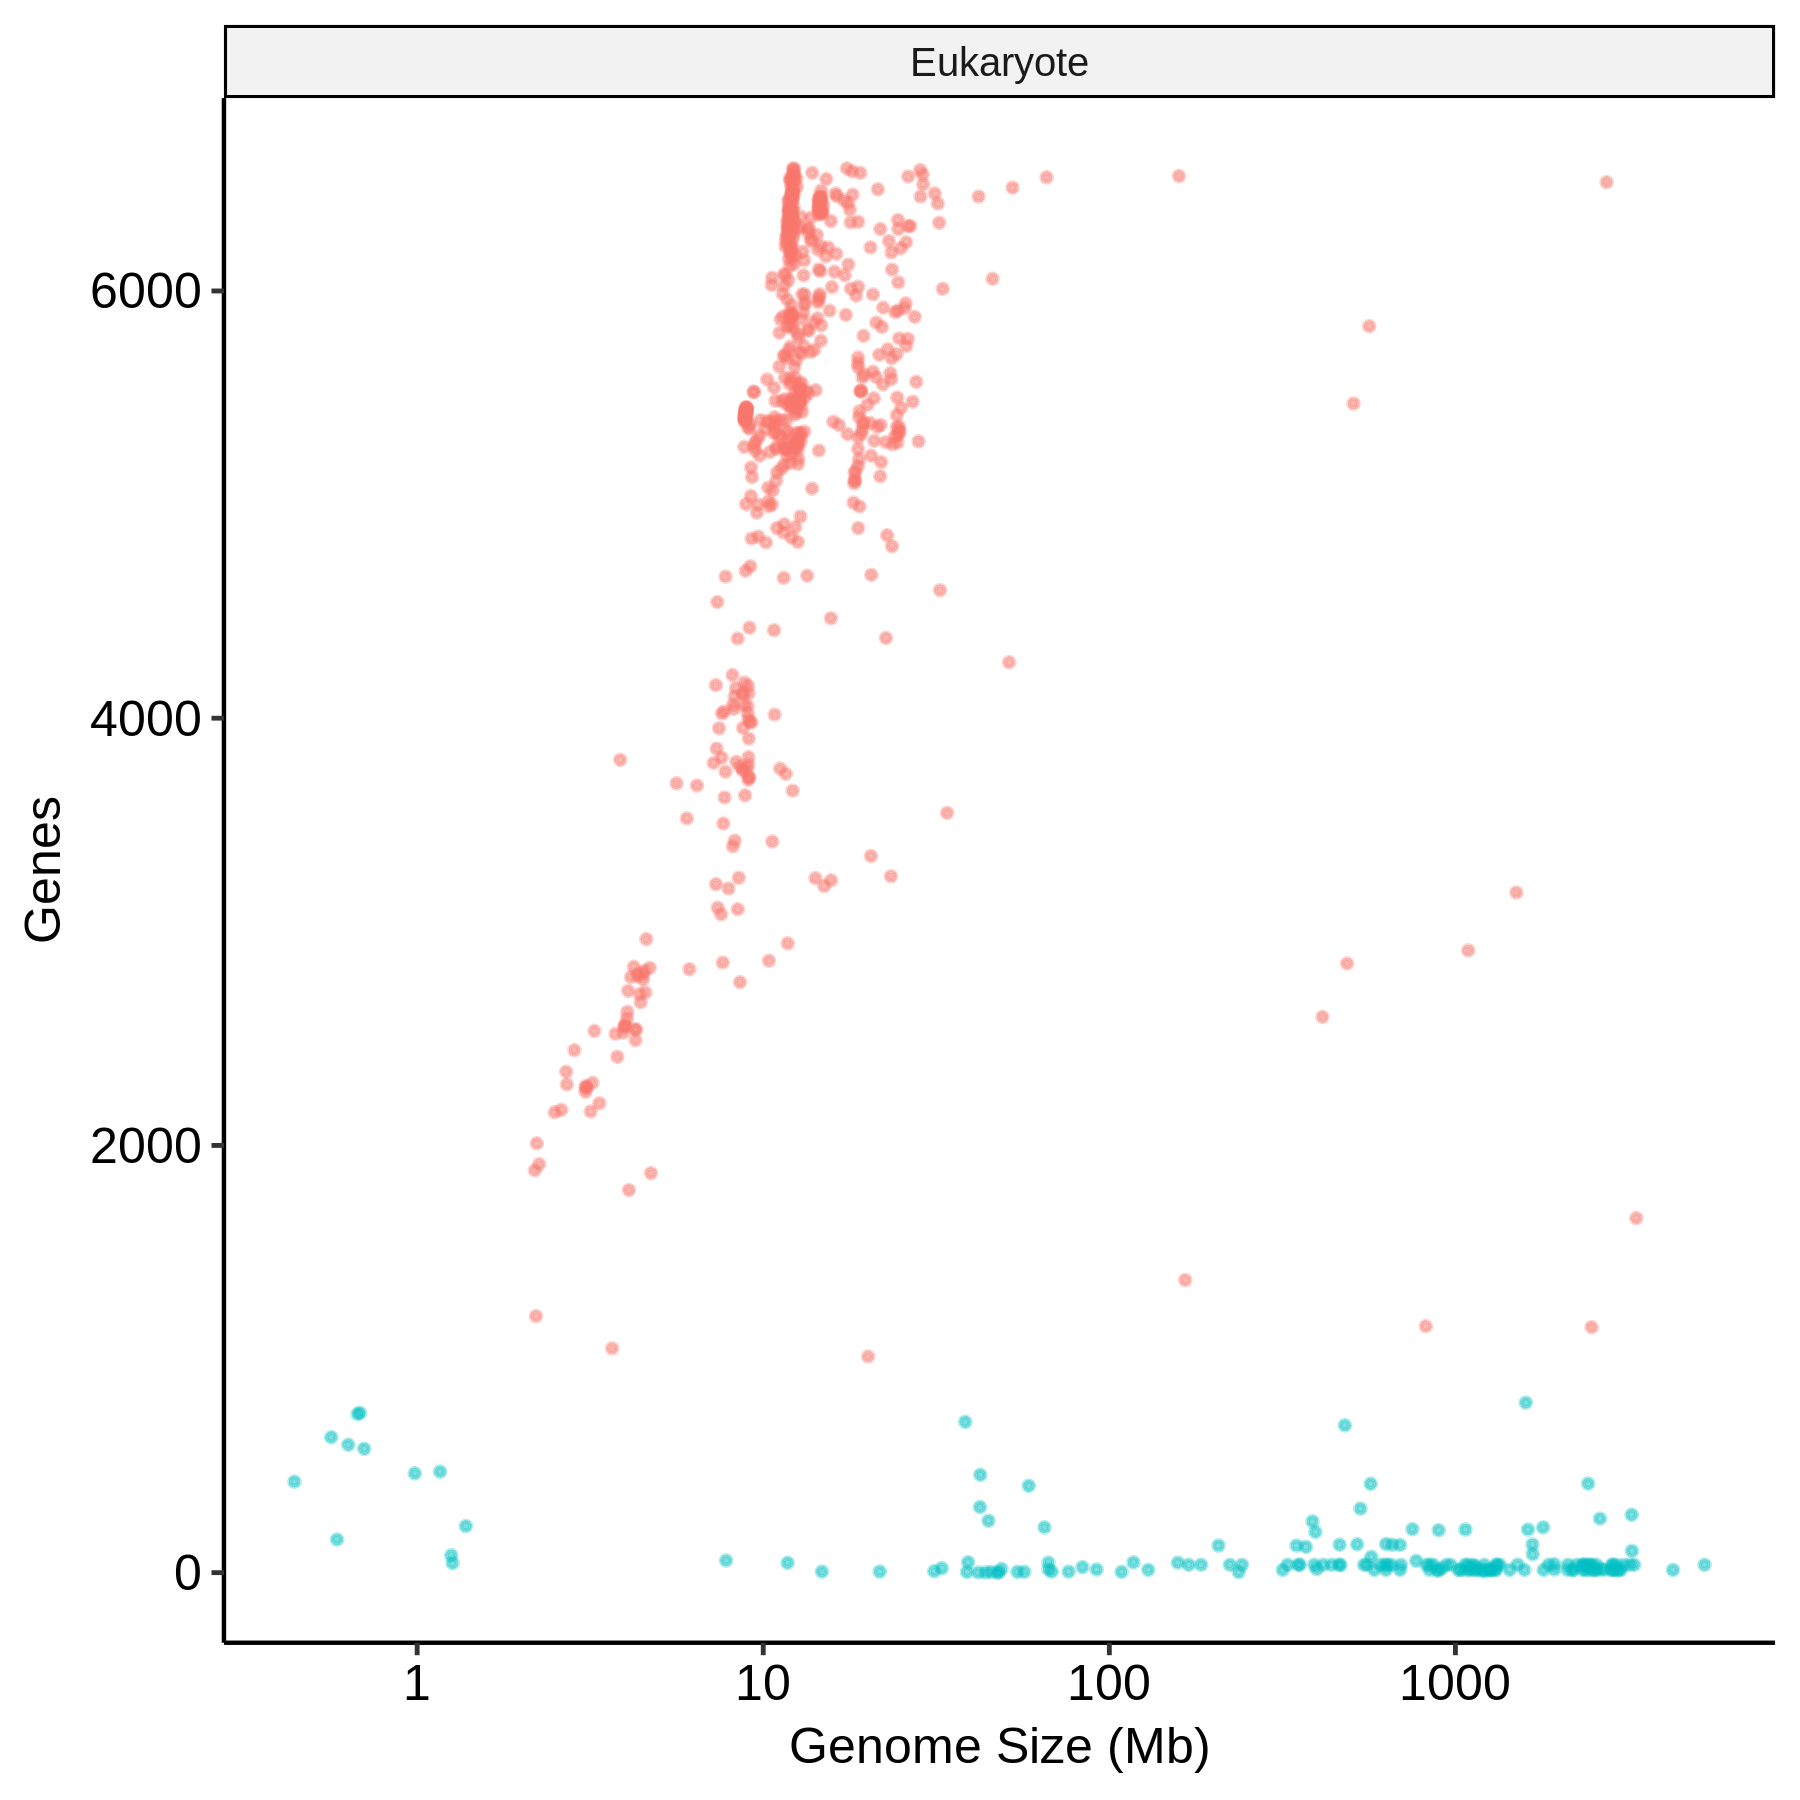

In [54]:
# set plot width and height
options(repr.plot.width = 6, repr.plot.height =6, repr.plot.res = 300)

# SEE https://colab.research.google.com/drive/1dfdE5dgJdMY3qo5GFtIJktMLSZEv3nNq FOR EXAMPLE CODE
eukaryotes_data <- data.ultrafiltered %>%
  filter(taxon == "Eukaryote")

eukaryotes_data$Gene_cluster <- ifelse(eukaryotes_data$Genes > 900 , "Cluster 1", "Cluster 2")

# INSERT CODE HERE
# the ones in red and blue are the different clusters
# NOTE:
# The RED cluster shows an exponential increase in the number of genes when compared to the logarithm of the genome size(which is quite interesting) !!
# The BLUE cluster shows a linear increase in the number of genes when compared to the logarithm of the genome size(which seems a bit off, because as genome
# size increases there is almost no increase in the number of genes) ?? !!! :note end

colnames(eukaryotes)

ggplot(data = eukaryotes_data, aes(x = (`Size (Mb)`) , y = (Genes), colour = Gene_cluster))+
      geom_point(size= 1 , alpha = 0.3) +
      geom_jitter(size = 0.5 , alpha = 0.3)+
      theme(legend.position = "none")+
      facet_wrap(~taxon, scales = "free")+
      scale_x_log10()+
      labs(x = "Genome Size (Mb)", y = "Genes")
  ggsave("Eukaryotes_GenesVSgenomeSize.png")